# Web Scraping using Beautiful Soup

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [9]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [10]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [11]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [12]:
# get the title
title = soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [13]:
# get text

text = soup.get_text()
print(text)








2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results





        @media print {
            .noprint {
                display: none;
            }

            .dataTables_filter {
                display: none;
            }
        }

        #individualResults tbody tr {
            cursor: pointer;
        }

        .video-container {
            position: relative;
            padding-bottom: 56.25%; /* 16:9 */
            padding-top: 25px;
            height: 0;
        }

            .video-container iframe {
                position: absolute;
                top: 0;
                left: 0;
                width: 100%;
                height: 100%;
            }

        .dataTables_wrapper .dataTables_paginate {
            float: right;
            text-align: right;
            padding-top: 0.25em;
        }

            .dataTables_wrapper .dataTables_paginate .paginate_button {
                box-sizing: border-box;
                display: inlin

In [14]:
# find_all method  extracts html tags within the webpage
soup.find_all('a') # gets all the hyperlinks

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a href="#individual">Individual Results</a>,
 <a href="#team">Team Results</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px">5K</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px">Summary</a>,
 <a href="#tabs-1" style="font-size: 18px">10K Results</a>,
 <a name="individual"></a>,
 <a name="team"></a>,
 <a href="https://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="https://facebook.com/hubertiming/"><img src="/results/FB-f-Logo__blue_50.png"/></a>]

In [15]:
soup.find_all('table') # gets all the tables

[<table class="pull-right text-xs-right">
 <tbody>
 <tr colspan="2"><b>10K:</b></tr>
 <tr><td>Finishers:</td><td>577</td></tr>
 <tr><td>Male:</td><td>414</td></tr>
 <tr><td>Female:</td><td>163</td></tr>
 </tbody>
 </table>,
 <table class="table table-striped table-hover ht-table table-responsive-md table-bordered" id="individualResults">
 <thead>
 <tr class="header">
 <th>Place</th>
 <th>Bib</th>
 <th>Name</th>
 <th>Gender</th>
 <th>City</th>
 <th>State</th>
 <th>Chip Time</th>
 <th>Chip Pace</th>
 <th>Gender Place</th>
 <th>Age Group</th>
 <th>Age Group Place</th>
 <th>Time to Start</th>
 <th>Gun Time</th>
 <th>Team</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>1</td>
 <td>814</td>
 <td>JARED WILSON</td>
 <td>M</td>
 <td>TIGARD</td>
 <td>OR</td>
 <td>36:21</td>
 <td>5:51</td>
 <td>1 of 414</td>
 <td>M 36-45</td>
 <td>1 of 152</td>
 <td>0:03</td>
 <td>36:24</td>
 <td></td>
 </tr>
 <tr>
 <td>2</td>
 <td>573</td>
 <td>NATHAN A SUSTERSIC</td>
 <td>M</td>
 <td>PORTLAND</td>
 <td>OR</td>
 <td>3

In [19]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get('href'))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
#individual
#team
/results/2017GPTR
/results/summary/2017GPTR10K
#tabs-1
None
None
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [23]:
# Print the first 10 rows for sanity check

rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2"><b>10K:</b></tr>, <tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr>
<td>1</td>
<td>814</td>
<td>JARED WILSON</td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>5:51</td>
<td>1 of 414</td>
<td>M 36-45</td>
<td>1 of 152</td>
<td>0:03</td>
<td>36:24</td>
<td></td>
</tr>, <tr>
<td>2</td>
<td>573</td>
<td>NATHAN A SUSTERSIC</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>5:55</td>
<td>2 of 414</td>
<td>M 26-35</td>
<td>1 of 154</td>
<td>0:03</td>
<td>36:45</td>
<td>INTEL TEAM F</td>
</tr>, <tr>
<td>3</td>
<td>687</td>
<td>FRANCISCO MAYA</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>37:44</td>
<td>6:05<

In [24]:
# iterate through table rows and print out the cells of the rows
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>14TH</td>, <td>INTEL TEAM M</td>, <td>04:43:23</td>, <td>00:58:59 - DANIELLE CASILLAS</td>, <td>01:02:06 - RAMYA MERUVA</td>, <td>01:17:06 - PALLAVI J SHINDE</td>, <td>01:25:11 - NALINI MURARI</td>]


bs4.element.ResultSet

In [29]:
# remove the html tags and extract the text using BeautifulSoup

str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, 'lxml').get_text()
print(cleantext)
type(cleantext)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


str

In [28]:
 # remove the html tags and extract the text using regular expression 
 # (This is not recomended as it requires multi lines of code and can easily make mistakes) 
import re

list_rows = []
for row in rows:
    cells = row.find_all("td")
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '', str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


str

In [37]:
# convert list into dataframe

df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, JARED WILSON, M, TIGARD, OR, 36:21, 5..."
6,"[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ..."
7,"[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 37:4..."
8,"[4, 623, PAUL MORROW, M, BEAVERTON, OR, 38:34,..."
9,"[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 39..."


# Data Manipulation and Cleaning

In [96]:
# Datat manipulation and cleaning
df1 = df[1:]
df1 = df1[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None,None,None,None,None
5,[1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]
10,[6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,6:25,6 of 414,M 18-25,1 of 34,0:06,39:55,]


In [97]:
# getting rid of unwanted square brackets surrounding each row
df1[0] = df1[0].str.strip('[')
df1[1] = df1[1].str.strip(']')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,Finishers:,577,None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]
10,6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,6:25,6 of 414,M 18-25,1 of 34,0:06,39:55,]


In [98]:
# getting the header
col_labels = soup.find_all('th')
print(col_labels)

[<th>Place</th>, <th>Bib</th>, <th>Name</th>, <th>Gender</th>, <th>City</th>, <th>State</th>, <th>Chip Time</th>, <th>Chip Pace</th>, <th>Gender Place</th>, <th>Age Group</th>, <th>Age Group Place</th>, <th>Time to Start</th>, <th>Gun Time</th>, <th>Team</th>]


In [99]:
# extrating text from header without html tag
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, 'lxml').get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [100]:
# converting the list of header to dataframe
df_header = pd.DataFrame(all_header)
df_header.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [101]:
# spliting column 0 into multiple columns at the comma position for all rows
df_header = df_header[0].str.split(',', expand=True)
df_header.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [102]:
# removing the unwanted square brackets
df_header[0] = df_header[0].str.strip('[')
df_header.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [103]:
# concating dataframes
frames = [df_header, df1]

df_combined = pd.concat(frames)
df_combined.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
1,Finishers:,577,None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [104]:
# assigning the first row to be the table header
df5 = df_combined.rename(columns=df_combined.iloc[0])
df5.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
1,Finishers:,577,None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414,None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163,None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None


In [105]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 14 columns):
Place               597 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          578 non-null object
 Gender Place       578 non-null object
 Age Group          578 non-null object
 Age Group Place    578 non-null object
 Time to Start      578 non-null object
 Gun Time           578 non-null object
 Team]              578 non-null object
dtypes: object(14)
memory usage: 65.4+ KB


In [106]:
df5.shape

(597, 14)

In [107]:
# dropping rows with missing values
df6 = df5.dropna(axis=0, how='any')
df6.head(10)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]
10,6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,6:25,6 of 414,M 18-25,1 of 34,0:06,39:55,]
11,7,144,GEORGE TOTONCHY,M,PORTLAND,OR,40:04,6:27,7 of 414,M 36-45,3 of 152,0:13,40:17,]
12,8,395,BENJAMIN C CHAFFIN,M,PORTLAND,OR,40:05,6:27,8 of 414,M 36-45,4 of 152,0:04,40:09,]
13,9,7,BRANDON THOMAS,M,,,40:17,6:29,9 of 414,M 26-35,3 of 154,0:07,40:24,COLUMBIA TEAM B]


In [108]:
# dropping replicated header row
df7 = df6.drop(df6.index[0])
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [109]:
# renaming Team column
df7.rename(columns={' Team]' : 'Team'}, inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [110]:
# getting rid of closing square bracket in Team column
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F


# Data Analysis and Visualization

In [115]:
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F


In [124]:
# finding average finish time for the runner
time_list = df7[' Chip Time'].tolist()
# converting 'Chip Time' to minutes
#print(time_list)
time_mins = []
for time in time_list:
    #print(time)
    #print(time.count(':'))
    
    #checkig if time has only minute and seconds and calculating the minutes accordingly 
    if(time.count(':') == 1):
        m , s = time.split(':')
        math = (int(m) * 60 + int(s)) / 60
    else:
        h, m, s = time.split(':')
        math = (int(h) * 3600 + int(m) * 60 + int(s)) / 60

    time_mins.append(math)
print(time_mins)


[36.35, 36.7, 37.733333333333334, 38.56666666666667, 39.35, 39.81666666666667, 40.06666666666667, 40.083333333333336, 40.28333333333333, 40.35, 40.46666666666667, 40.6, 40.71666666666667, 41.016666666666666, 41.31666666666667, 41.71666666666667, 41.983333333333334, 42.38333333333333, 42.483333333333334, 42.583333333333336, 42.6, 42.61666666666667, 42.93333333333333, 43.43333333333333, 43.45, 43.666666666666664, 43.7, 43.71666666666667, 43.766666666666666, 43.766666666666666, 43.78333333333333, 43.78333333333333, 44.06666666666667, 44.083333333333336, 44.1, 44.11666666666667, 44.38333333333333, 44.63333333333333, 44.68333333333333, 44.7, 44.8, 45.05, 45.083333333333336, 45.166666666666664, 45.18333333333333, 45.18333333333333, 45.21666666666667, 45.233333333333334, 45.25, 45.28333333333333, 45.45, 45.46666666666667, 45.483333333333334, 45.6, 45.6, 45.666666666666664, 45.666666666666664, 45.81666666666667, 45.916666666666664, 46.03333333333333, 46.21666666666667, 46.333333333333336, 46.3

In [125]:
# assigning the chip times expressed in minutes to new column named 'Runner_mins'
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F,36.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,,38.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F,39.350000


In [127]:
# calculating statistics for numeric columns only
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


In [129]:
# visualizing data in boxplot
from pylab import rcParams

rcParams['figure.figsize'] = 15,5


([<matplotlib.axis.XTick at 0x1a2cdad908>],
 <a list of 1 Text xticklabel objects>)

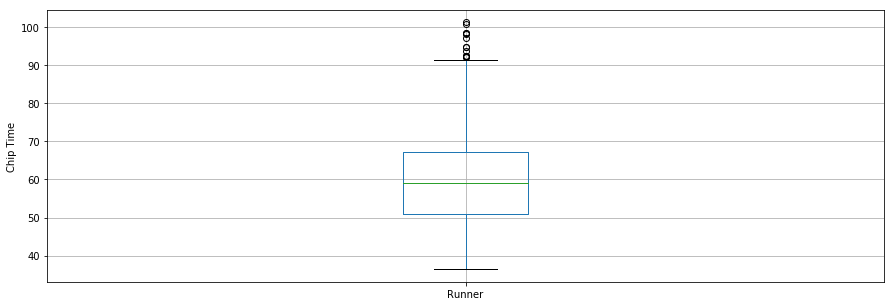

In [130]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runner'])

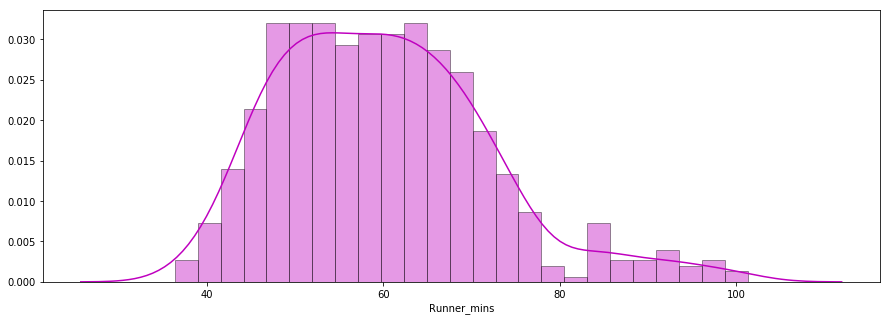

In [132]:
# Did the runner's finish time follow a normal distribution?

x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor': 'black'})
plt.show()

In [156]:
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F,36.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,,38.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F,39.350000


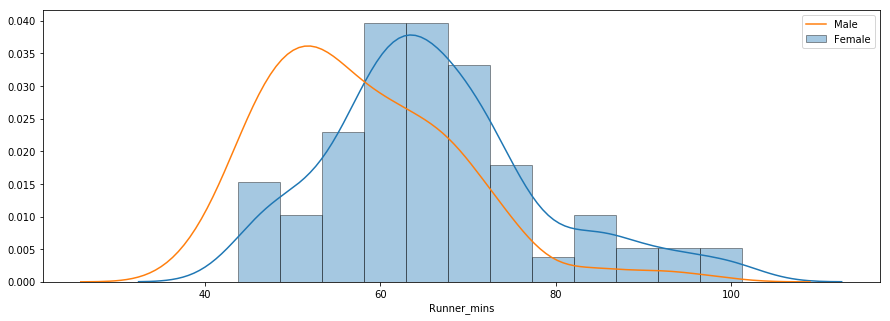

In [158]:
# were there performance differences between males and females of various age groups?

f_fuko = df7.loc[df7[' Gender'] == ' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender'] == ' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor': 'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor': 'black'}, label='Male')
plt.legend()

In [160]:
# It can be clearly seen that the performance of male runner are significaly better than the female one, meaning
# male were faster than female

In [161]:
# computing the summary statistics for males and females
g_stats = df7.groupby(' Gender', as_index=True).describe()
print(g_stats)

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


Text(0.5, 0.98, '')

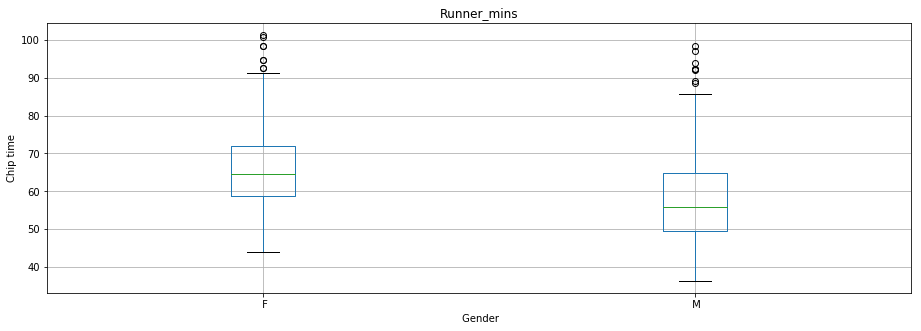

In [163]:
# side by side boxplot comparison of male and female finish times.
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip time')
plt.suptitle('')